<a href="https://colab.research.google.com/github/rsmondejar/viu_aprendizaje_supervisado/blob/main/tema2/aprendizaje_supervisado_tema2_validacion_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://github.com/ssanchezgoe/viu_aprendizaje_supervisado/blob/main/logos/logo_viu.png?raw=true" align="left" hspace="10px" vspace="0px"></p>

<h1> Asignatura de Inteligencia Artificial</h1>


La presente asignatura hace parte del máster oficial en Inteligencia Artificial, impartido en la Universidad Internacional de Valencia (VIU).

<p><a name="contents"></a></p>

# Contenido

- <a href="#val">1 Validación</a><br>
 - <a href="#hold_out_cross_val">1.1 Validación hold-out y validación cruzada</a><br>
 - <a href="#bstrap">1.2 Bootstrapping</a><br>
 - <a href="#mod_val">1.3 Over/under-fitting</a><br>
 - <a href="#val_cur">1.4 Curvas de validación</a><br>
 - <a href="#lea_cur">1.5 Curvas de aprendizaje</a><br>


<p><a name="msel"></a></p>

# 1. Validación:

[[Contenidos]](#contents)

La elección del modelo y de los hiperparámetros es tal vez la parte más importante para darle un uso efectivo a estas herramientas y técnicas. Para tomar una decisión acertada respecto a qué modelo e hiperparámetros elegir, necesitamos una forma de validar que estos se ajusten bien a los datos.

Este proceso inicia por una correcta partición de los datos; a continuación estudiaremos tres formas comunes de llevar a cabo la esta tarea:

- Validación hold-out
- Validación cruzada
- Bootstrapping

>**NOTAS DE CLASE**  
>Un proceso de validación de modelos implica:
>- Validación de los datos
>- Determinación del modelo
>- Obtención de hiperparámetros


<p><a name="hold_out_cross_val"></a></p>

## 1.1 Validación hold-Out y validación cruzada.

[[Contenidos]](#contents)

Existen dos aproximaciones estándar para la evaluación de los modelos, creadas con el fin de probar la capacidad de generalización de estos y su intependencia respecto a la partición de los datos:

- **Validación Hold-out**: en la que se realiza una partición de los datos en entrenamiento (train) y prueba (test).

- **Validación cruzada**: en la que se hacen $n$ iteraciones, dividiendo el conjunto de datos en $n$ subconjuntos. Cada subconjunto de datos se use como un conjunto de entrenamiento y como un conjunto de validación. En la siguiente figura ilustra el proceso:

![picture](https://www.analyticslane.com/wp-content/uploads/2018/07/validacion_cruzada.jpeg)

>**NOTAS DE CLASE**   
> 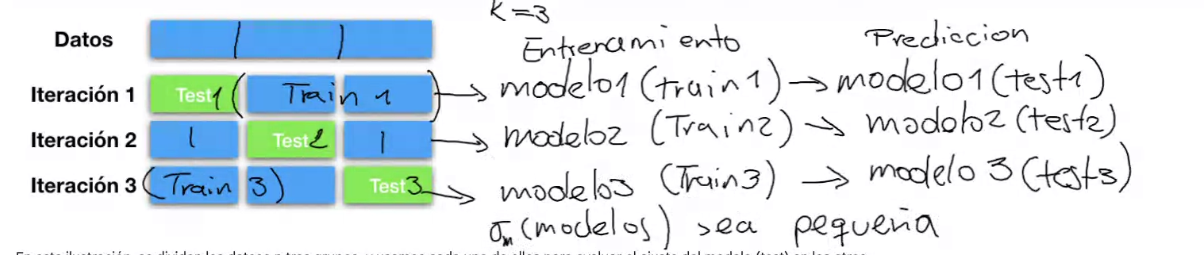

En esta ilustración, se dividen los datose n tres grupos, y usamos cada uno de ellos para evaluar el ajuste del modelo (test) en los otros 2/3 de los datos para su entrenamiento (train). Como salida tendremos tres puntajes de desempeño del modelo, que podríamos combinar (por ejemplo, tomando la media) para obtener una mejor medición del rendimiento del modelo global.


Veamos un ejemplo de estos métodos de partición de datos.

In [2]:
from sklearn.datasets import load_diabetes
# Validación Hold-out
from sklearn.model_selection import train_test_split
# Validación K-folds, validación cruzada
from sklearn.model_selection import KFold
import numpy as np

> **NOTA:**  
> En esta URL se puede ver la info del dataset de diabetes:  
> [https://www.geeksforgeeks.org/machine-learning/sklearn-diabetes-dataset/](https://www.geeksforgeeks.org/machine-learning/sklearn-diabetes-dataset/)

In [3]:
# Ver la info del dataset de diabletes
load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
# Carga de datos

X, y = load_diabetes(return_X_y = True)
X_data, y_data = X[0:100], y[0:100]

>**NOTAS DE CLASE**  
>Ver más en internet sobre los posibles parámetros de `train_test_split`:
>- `random_state = 0`, nos permite repetibilidad de las pruebas ya que sino sería muy complicado saber si estamo afinando nuestro modelo.

In [8]:
# Partición para validación hold-out
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 0)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

# si queremos cambiar el tamaño del test_size
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 0, test_size=0.3)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

# si queremos cambiar el tamaño del complementario del train_size
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 0, train_size=0.7)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

# si queremos cambiar el tamaño de test_size y train_size, se puede siempre que la suma no super 1
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 0, test_size=0.3, train_size=0.7)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

X_train: (75, 10), X_test: (25, 10)
X_train: (70, 10), X_test: (30, 10)
X_train: (70, 10), X_test: (30, 10)
X_train: (70, 10), X_test: (30, 10)


>**NOTAS DE CLASE**   
>Por ejemplo si ponenmos una K de 100 (numero de plieges) para unos 1000 datos, quedaría así, siendo muchos casos de test:  
>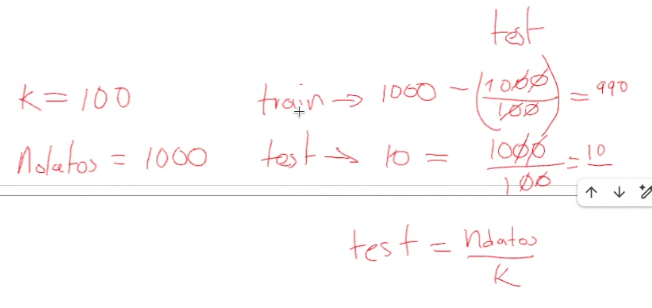  
>El profesor comenta que lo normal es validar con pliegues entre 5 y 7, pero depende de los datos.

In [20]:
# Partición para validación cruzada
kf = KFold(3, shuffle = True) # partición aleatoria
#kf = KFold(4, random_state = 2, shuffle = True) # partición no aleatoria
# enumerate splits
for i, (train_index, test_index) in enumerate(kf.split(X_data)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index} \n len {len(train_index)}\n")
  print(f"  Test:  index={test_index} \n len {len(test_index)} \n")

Fold 0:
  Train: index=[ 2  3  4  6  8  9 11 12 13 14 15 16 19 21 22 23 24 27 29 30 31 32 33 34
 35 37 38 39 40 41 42 43 44 45 46 47 50 53 54 56 57 58 60 61 63 64 68 69
 71 72 73 76 77 78 80 81 84 85 87 88 90 92 93 95 98 99] 
 len 66

  Test:  index=[ 0  1  5  7 10 17 18 20 25 26 28 36 48 49 51 52 55 59 62 65 66 67 70 74
 75 79 82 83 86 89 91 94 96 97] 
 len 34 

Fold 1:
  Train: index=[ 0  1  4  5  6  7  9 10 12 13 14 16 17 18 19 20 21 23 24 25 26 28 31 32
 33 34 36 37 41 43 48 49 50 51 52 53 54 55 58 59 60 61 62 64 65 66 67 69
 70 71 73 74 75 79 80 82 83 86 87 89 91 92 93 94 96 97 98] 
 len 67

  Test:  index=[ 2  3  8 11 15 22 27 29 30 35 38 39 40 42 44 45 46 47 56 57 63 68 72 76
 77 78 81 84 85 88 90 95 99] 
 len 33 

Fold 2:
  Train: index=[ 0  1  2  3  5  7  8 10 11 15 17 18 20 22 25 26 27 28 29 30 35 36 38 39
 40 42 44 45 46 47 48 49 51 52 55 56 57 59 62 63 65 66 67 68 70 72 74 75
 76 77 78 79 81 82 83 84 85 86 88 89 90 91 94 95 96 97 99] 
 len 67

  Test:  index=[ 4  6  9 12 13

La repetición de la validación en diferentes subconjuntos de datos nos da una idea aún mejor del rendimiento del algoritmo. El esquema que acabamos de ver, que se implementa por defecto, se conoce como k-fold VC. Scikit-Learn implementa una serie de esquemas de VC que son útiles en situaciones particulares; Estos se implementan a través de iteradores en el módulo [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). También puede visitar la documentación del parámetro [scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para ver las métricas usadas para las diferentes tareas.

<p><a name="bstrap"></a></p>

## 1.2 Bootstraping

[[Contenidos]](#contents)

También es posible hacer la validación del modelo haciendo un particionado de datos con re-sampleo. De esta forma, se puede llevar a cabo estadísticas con niveles de confianza, algo que no puede realizarse en otros casos.

La partición del dataset se lleva a cabo mediante los siguientes pasos:

*   Se determina el tamaño de la muestra por el usuario.
*   Se selecciona iterativamente una instancia de la muestra, mientras el número de instancias en la muestra sea menor al tamaño determinado por el usuario.
* Todos los datos que no hayan sido elegidos para la muestra de entrenamiento serán elegidos como muestra de test. A éstos datos se les conoce generalmente como **out of bags** (fuera de la bolsa).

En la selección es posible que una instancia sea elegida más de una vez para hacer parte de la muestra de entrenamieto, sin embargo jamás habrán instancias en ambas muestras (train, test).

Así es posible generar estadísticas de la robustes de nuestro algoritmo sobre datos nunca vistos.



En la siguiente figura se ilustran las tres técnicas de partición de datos vistas:

![picture](https://d3ansictanv2wj.cloudfront.net/emlm_0302-6a388b903f6e1e04c95e718940eff039.png)




In [21]:
from sklearn.utils import resample #metodo de muestreo con remplazox

In [38]:
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
#crear la muestra de bootstrap
# Al poner random state con un valor diferente a 0, lo datos siempre son los mismos
boot = resample(data, replace=True, n_samples=5, random_state=3)
print('Bootstrap:',boot)
# out of bag
oob = [x for x in data if x not in boot]
print('OOB:',oob)

Bootstrap: [0.3, 0.1, 0.2, 0.4, 0.1]
OOB: [0.5, 0.6]


Validemos con éste método sobre un modelo lineal de los creados en clases pasadas:

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn import metrics


df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
df.dropna(inplace=True)
data= df[['ENGINESIZE','CO2EMISSIONS']].values

In [47]:
# Forma del dataset
print("Tamaño:", df.shape)

Tamaño: (1067, 13)


In [53]:
MAE = []
n_rep = 40

for i in range(n_rep):
  boot = resample(data, replace=True, n_samples=int(len(data)/2))
  #boot = resample(data, replace=True, n_samples=int(2*len(data)/3))
  oob = np.array([x for x in data if x.tolist() not in boot.tolist()])

  X_train = boot[:,0].reshape(-1,1)
  y_train = boot[:,1]
  X_test = oob[:,0].reshape(-1,1)
  y_test = oob[:,1]
  #entrenamos el modelo
  elastic = ElasticNet(alpha=0.01,l1_ratio=1)
  elastic.fit(X_train,y_train)
  y_pred = elastic.predict(X_test)
  mae = metrics.mean_absolute_error(y_test, y_pred)
  MAE.append(mae)

In [51]:
len(MAE)

40

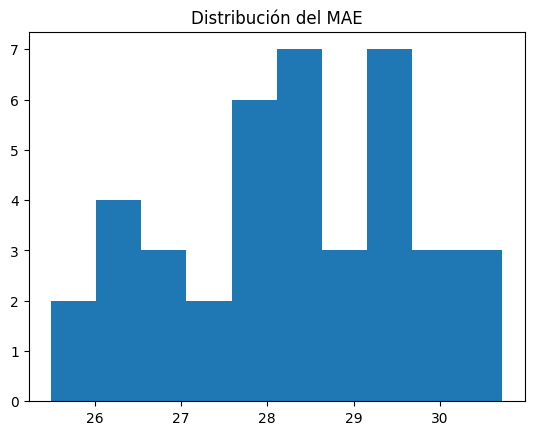

In [40]:
import matplotlib.pyplot as plt
plt.hist(MAE)
plt.title(r'Distribución del MAE')
plt.show()

In [41]:
media = np.mean(MAE)
dstd = np.std(MAE)
print('Error MAE:',media,'+/-',dstd)

Error MAE: 28.26737440636638 +/- 1.3060182178277868


Como vemos es posible generar estadísticas sobre nuestros errores y su distribución, además de su intervalo de confianza, así podemos hacer afirmaciones con mayor certeza dobre la robustez de nuetro modelo.

<p><a name="mod_val"></a></p>

## 1.3 Over/under-fitting.

[[Contenidos]](#contents)

Introduzcamos ambos conceptos mediante la siguiente ilustración de dos modelos con problemáticas distintas:

![picture](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-bias-variance.png?raw=true)


Está claro que ninguno de estos modelos se ajusta bien a los datos, pero fallan de diferentes maneras:

- El modelo de la izquierda intenta ajustar una línea recta a los datos. Debido a que los datos son intrínsecamente más complejos, el modelo de línea recta nunca podrá describir bien este conjunto de datos. Decimos entonces que el modelo tiene un sesgo alto o underfitting.

- El modelo de la derecha ajusta los datos mediante un polinomio de grado superior. El ajuste del modelo tiene suficiente flexibilidad para explicar adecuadamente las características de los datos de entrenamiento, pero no a los datos de validación o test. Decimos entonces que el modelo tiene una alta varianza u overfitting.

![picture](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-bias-variance-2.png?raw=true)

Si imaginamos que tenemos alguna capacidad para ajustar la complejidad del modelo, esperaríamos que el puntaje de entrenamiento y el puntaje de prueba se comporten como se ilustra en la siguiente figura


![picture](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-validation-curve.png?raw=true)

* El puntaje de entrenamiento siempre es más alto que el puntaje de prueba.
* Para una complejidad de modelo muy baja (un modelo con alto sesgo), los datos de entrenamiento no son adecuados, lo que significa que el modelo es un mal predictor tanto para los datos de entrenamiento como para cualquier dato no visto previamente.
* Para una complejidad de modelo muy alta (un modelo con alta varianza), los datos de entrenamiento están sobreajustados, lo que significa que el modelo predice muy bien los datos de entrenamiento, pero falla para cualquier dato no visto previamente.
* Para algún valor intermedio, la curva de validación tiene un máximo. Este nivel de complejidad indica una compensación adecuada entre sesgo y varianza.

<p><a name="val_cur"></a></p>

## 1.4 Curvas de validación

[[Contenidos]](#contents)

Veamos un ejemplo de uso de validación cruzada para calcular la curva de validación para un modelo de regresión polinomial. Utilizaremos un *pipeline* que contenga la operación de preprocesamiento polinomial (`PolynomialFeatures`) y la regresión lineal (`LinearRegression`)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Generemos unos datos para ajustar el modelo

In [55]:
import numpy as np

def datos(N, err=1.0, rseed=1):
    # generar datos de forma aleatoria
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = datos(40)

Ahora podemos visualizar nuestros datos, junto con ajustes polinómicos de varios grados.

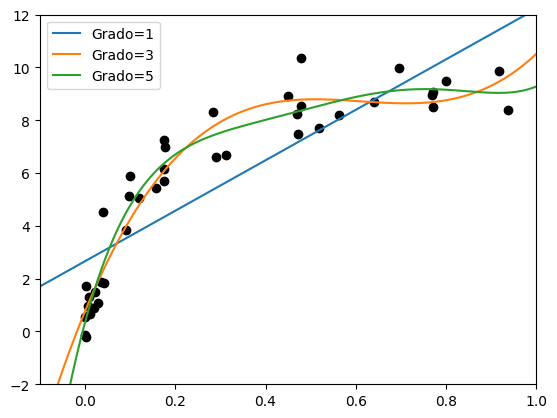

In [60]:
import matplotlib.pyplot as plt

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

degress = [1, 3, 5]
#degress = [1, 2, 3, 5, 8, 10]

for degree in degress:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='Grado={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Lo que controla la complejidad del modelo en este caso es el grado del polinomio. ¿qué grado de polinomio proporciona una compensación adecuada entre el sesgo (subajuste) y la varianza (sobreajuste)?

Podemos visualizar la curva de validación para este modelo y datos particulares; Esto se puede hacer directamente usando la función validation_curve provista por Scikit-Learn. Dado un modelo, datos, nombre de parámetro y un rango para explorar, esta función calculará automáticamente tanto el puntaje de entrenamiento como el puntaje de validación en todo el rango

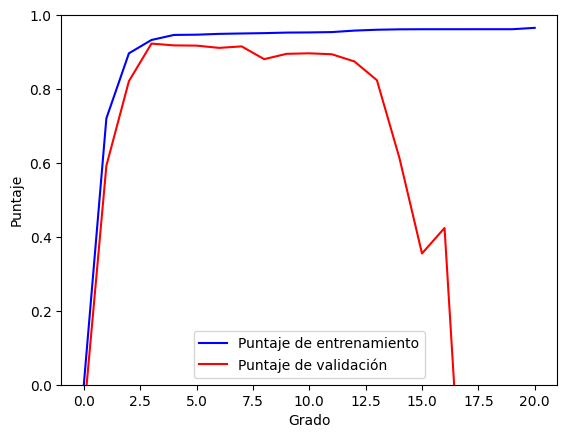

In [61]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, param_name = 'polynomialfeatures__degree', param_range = degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='Puntaje de entrenamiento')
plt.plot(degree, np.median(val_score, 1), color='red', label='Puntaje de validación')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Grado')
plt.ylabel('Puntaje');

Esto muestra con precisión el comportamiento cualitativo que esperamos: el puntaje de entrenamiento es en todas partes más alto que el puntaje de validación; el puntaje de entrenamiento mejora monotónicamente con una mayor complejidad del modelo; y la puntuación de validación alcanza un máximo antes de caerse a medida que el modelo se sobreajusta.

A partir de la curva de validación, podemos deducir que el equilibrio óptimo entre sesgo y varianza se encuentra para un polinomio de tercer orden:

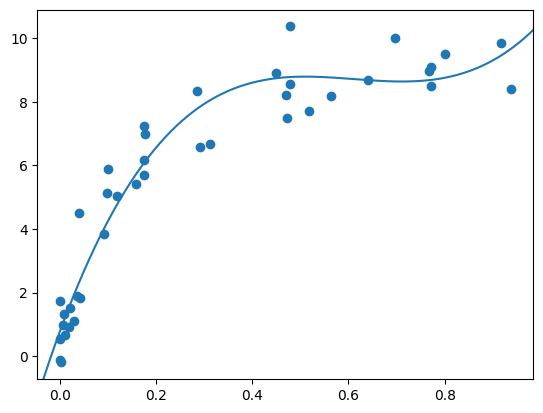

In [72]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
# Para este caso, con un polinomio de grado 3 se aproxima bastante
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

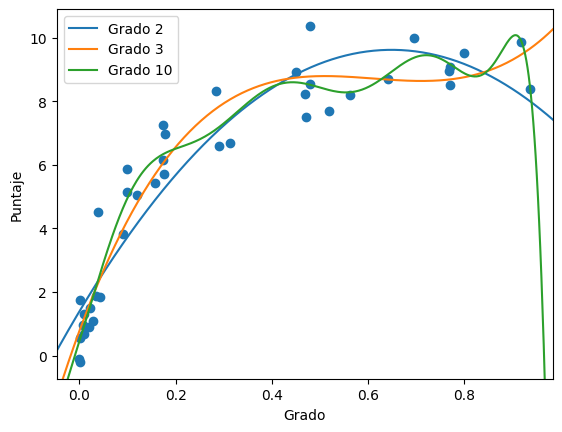

In [82]:
# Probando varios grados de polinomio
plt.scatter(X.ravel(), y)
lim = plt.axis()
plt.plot(X_test.ravel(), PolynomialRegression(2).fit(X, y).predict(X_test), label="Grado 2");
plt.plot(X_test.ravel(), PolynomialRegression(3).fit(X, y).predict(X_test), label="Grado 3");
plt.plot(X_test.ravel(), PolynomialRegression(10).fit(X, y).predict(X_test), label="Grado 10");
plt.axis(lim);
plt.legend(loc='best')
plt.xlabel('Grado')
plt.ylabel('Puntaje');

<p><a name="lea_cur"></a></p>

## 1.5 Curvas de aprendizaje

[[Contenidos]](#contents)



Un aspecto importante de la complejidad del modelo es que el modelo óptimo generalmente dependerá del tamaño de los datos de entrenamiento. Por ejemplo, generemos un nuevo conjunto de datos con un factor de cinco puntos más:

In [ ]:
X2, y2 = datos(200)
plt.scatter(X2.ravel(), y2);

Trazemos la curva de validación

In [ ]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, param_name = 'polynomialfeatures__degree', param_range = degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Las líneas continuas muestran los nuevos resultados, mientras que las líneas discontinuas más débiles muestran los resultados del conjunto de datos anterior más pequeño. A partir de la curva de validación, es claro que el conjunto de datos más grande puede admitir un modelo mucho más complicado: el pico se da alrededor de un grado 6, pero incluso un modelo de grado 20 no está sobreajustando los datos: los puntajes de entrenamiento y de validación están muy cercanos. Por lo tanto, vemos que el comportamiento de la curva de validación no tiene una sino dos entradas importantes: la complejidad del modelo y el número de puntos de entrenamiento.

Scikit-Learn ofrece una práctica utilidad para calcular tales curvas de aprendizaje de sus modelos; Aquí calcularemos una curva de aprendizaje para nuestro conjunto de datos original con un modelo polinomial de segundo orden y un polinomio de noveno orden:

In [ ]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='Puntaje de entrenamiento')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='Puntaje de validación')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('Tamaño de los datos de entrenamiento')
    ax[i].set_ylabel('Puntaje')
    ax[i].set_title('Grado = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Este es un diagnóstico valioso, porque nos da una descripción visual de cómo nuestro modelo responde al aumento de los datos de entrenamiento. En particular, cuando la curva de aprendizaje ya ha convergido (es decir, cuando las curvas de entrenamiento y validación ya están cercanas entre sí), ¡agregar más datos de entrenamiento no mejorará significativamente el ajuste! Esta situación se ve en el panel izquierdo, con la curva de aprendizaje para el modelo de grado 2.

Trazar una curva de aprendizaje para nuestra elección particular de modelo y conjunto de datos puede ayudarnos a tomar una decisión sobre cómo avanzar para mejorar el análisis.